# Gauged Q-ball

In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp
from scipy.integrate import ode
from scipy.optimize import minimize
import sympy as sy
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import quad
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, legend, title, savefig
from matplotlib.font_manager import FontProperties
from scipy.integrate import cumulative_trapezoid
from IPython.display import display
from pylab import *

In [2]:
class Q_balls():
    def __init__(self, w0, M, λ, r):
        self.α0, self.x0, self.g0, self.yy0 = w0 
        self.M = M
        self.λ = λ
        self.r0, self.rf = r
    def Num_sol(self):
        def vectorfield(r, funs):
            α, x, g, yy = funs
            f = [x,
                -x*(2*r/(r**2+1e-12))+(1/(1-λ*(g**2)*np.sin(α)**2))*(2*x*yy*λ*g*np.sin(α)**2-(1/2)*(g**2)*(np.sin(2*α))*(1-λ*x**2)+(4*(M**2))*np.sin(α)),
                yy,
                -yy*(2*r/(r**2+1e-12)) + (0.13468/λ)*g*np.sin(α)**2*(1+λ*x**2)]       
            return f
        self.solution = solve_ivp(vectorfield, r, y0=w0, method='BDF')
        self.α, self.x, self.g, self.yy = self.solution.y
        self.rn = self.solution.t
    def ED(self):
        αn, dαn, gn, dgn = self.α, self.x, self.g, self.yy
        ED = (0.4231/λ)*((gn**2)*(np.sin(αn)**2)*(1+λ*dαn**2)+dαn**2 - 8*(M**2)*(np.cos(αn)-1)+7.425*λ*(dgn)**2  )
        return ED  
    def E(self):
        αn, dαn, gn, dgn, rn = self.α, self.x, self.g, self.yy, self.rn
        Eg = (rn**2)*((0.4231/λ)*((gn**2)*(np.sin(αn)**2)*(1+λ*dαn**2)+dαn**2 - 8*(M**2)*(np.cos(αn)-1)+7.425*λ*(dgn)**2  ))
        Int=cumulative_trapezoid(Eg, rn, initial=0)
        return Int
    def QD(self):       
        αn, dαn, gn, dgn = self.α, self.x, self.g, self.yy
        qg = 2*(0.4231/λ)*gn*(np.sin(αn)**2)*(1+λ*dαn**2)
        return qg
    def Q(self):
        αn, dαn, gn, dgn, rn = self.α, self.x, self.g, self.yy, self.rn
        Q =  rn**2*(2*(0.4231/λ)*gn*(np.sin(αn)**2)*(1+λ*dαn**2))
        QInt=cumulative_trapezoid(Q,rn, initial=0)
        return QInt

$\alpha' = x; \,\,\\
x' = -\frac{2}{r}x+ \frac{1}{(1-\lambda g^{2} \sin^{2} \alpha)} \left[ 2\lambda g x y \sin^{2}\alpha  -\frac{g^{2}}{2}\sin 2\alpha (1-\lambda x^{2}) +4 m^{2} \sin \alpha \right]; \,\,\\
g'=y; \,\,\\
y'= -\frac{2}{r}y+ 4K g \sin^{2}\alpha (1+\lambda x^{2}) $

In [3]:
λ, M = 1, 1
# Initial conditions
w0 = 7, 0, 5, 0
r = 0, 100

Q1 = Q_balls(w0, M, λ, r)
Q1.Num_sol()

In [4]:
λ, M = .73, 1
# Initial conditions
w0 = 7, 0, 5, 0
r = 0, 100

Q2 = Q_balls(w0, M, λ, r)
Q2.Num_sol()

In [5]:
λ, M = .073, 1
# Initial conditions
w0 = 7, 0, 5, 0
r = 0, 100

Q3 = Q_balls(w0, M, λ, r)
Q3.Num_sol()

In [6]:
λ, M = .0073, 1
# Initial conditions
w0 = 7, 0, 5, 0
r = 0, 100

Q4 = Q_balls(w0, M, λ, r)
Q4.Num_sol()

In [7]:
λ, M = .00073, 1
# Initial conditions
w0 = 7, 0, 5, 0
r = 0, 100

Q5 = Q_balls(w0, M, λ, r)
Q5.Num_sol()

In [180]:
λ, M = .0073, 1
# Initial conditions
w0 = 2, 0, 5, 0
r = 0, 100

Q6 = Q_balls(w0, M, λ, r)
Q6.Num_sol()

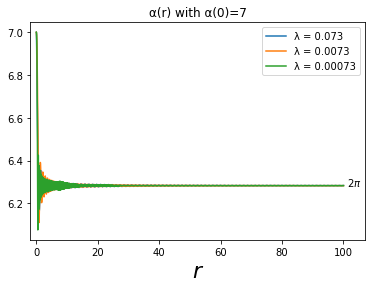

In [254]:
plt.plot(Q3.rn, Q3.α, label = 'λ = 0.073')
plt.plot(Q4.rn, Q4.α, label = 'λ = 0.0073')
plt.plot(Q5.rn, Q5.α, label = 'λ = 0.00073')
plt.text(101, 6.28,'$2π$')
#plt.plot(Q5.rn, Q5.g, label = 'g')
#plt.plot(r, y2_sol, label = 'g')
plt.xlim([-2, 107])
#plt.ylim([-0, 2.0])
plt.xlabel('$r$', fontsize=22)
plt.title('α(r) with α(0)=7')
plt.legend(loc='best')
#plt.show()
plt.savefig('a(r).png', dpi =150)

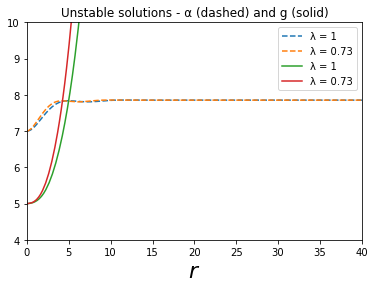

In [253]:
plt.plot(Q1.rn, Q1.α, '--', label = 'λ = 1')
plt.plot(Q2.rn, Q2.α, '--', label = 'λ = 0.73')
plt.plot(Q1.rn, Q1.g, label = 'λ = 1')
plt.plot(Q2.rn, Q2.g, label = 'λ = 0.73')
#plt.plot(Q5.rn, Q5.g, label = 'g')
#plt.plot(r, y2_sol, label = 'g')
plt.xlim([.0, 40])
plt.ylim([4, 10])
plt.xlabel('$r$', fontsize=22)
plt.title('Unstable solutions - α (dashed) and g (solid)')
plt.legend(loc='best')
#plt.show()
plt.savefig('unstable.png', dpi =150)

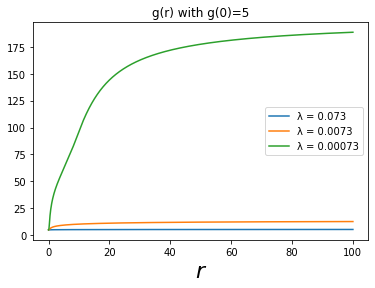

In [252]:
plt.plot(Q3.rn, Q3.g, label = 'λ = 0.073')
plt.plot(Q4.rn, Q4.g, label = 'λ = 0.0073')
plt.plot(Q5.rn, Q5.g, label = 'λ = 0.00073')
#plt.plot(Q5.rn, Q5.g, label = 'g')
#plt.plot(r, y2_sol, label = 'g')
#plt.xlim([.0, 40])
#plt.ylim([4, 180])
plt.xlabel('$r$', fontsize=22)
plt.title('g(r) with g(0)=5')
plt.legend(loc='best')
#plt.show()
plt.savefig('g(r).png', dpi =150)

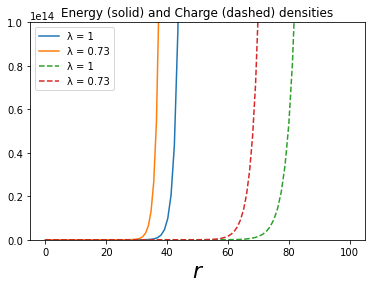

In [251]:
plt.plot(Q1.rn, Q1.ED(), label = 'λ = 1')
plt.plot(Q2.rn, Q2.ED(), label = 'λ = 0.73')
plt.plot(Q1.rn, Q1.QD(), '--', label = 'λ = 1',)
plt.plot(Q2.rn, Q2.QD(), '--', label = 'λ = 0.73')
plt.xlabel('$r$', fontsize=22)
#plt.xlim([.0, 40])
plt.ylim([.0, 1e14])
plt.title('Energy (solid) and Charge (dashed) densities')
plt.legend(loc='best')
#plt.show()
plt.savefig('div_dens.png', dpi =150)

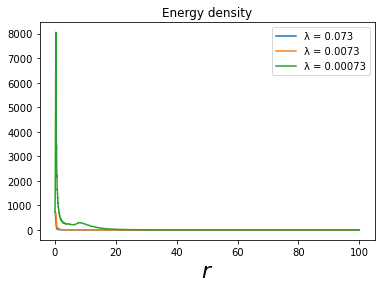

In [250]:
plt.plot(Q3.rn, Q3.ED(), label = 'λ = 0.073')
plt.plot(Q4.rn, Q4.ED(), label = 'λ = 0.0073')
plt.plot(Q5.rn, Q5.ED(), label = 'λ = 0.00073')
plt.xlabel('$r$', fontsize=22)
#plt.xlim([.0, 40])
#plt.ylim([.0, 1e])
plt.title('Energy density')
plt.legend(loc='best')
#plt.show()
plt.savefig('E_dens.png', dpi =150)

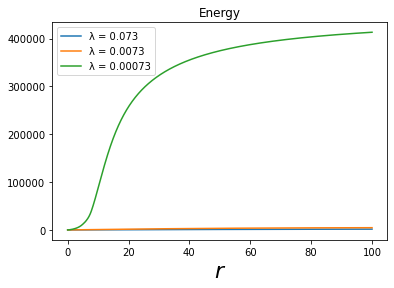

In [249]:
plt.plot(Q3.rn, Q3.E(), label = 'λ = 0.073')
plt.plot(Q4.rn, Q4.E(), label = 'λ = 0.0073')
plt.plot(Q5.rn, Q5.E(), label = 'λ = 0.00073')
plt.xlabel('$r$', fontsize=22)
#plt.xlim([.0, 40])
#plt.ylim([.0, 1e])
plt.title('Energy')
plt.legend(loc='best')
#plt.show()
plt.savefig('E.png', dpi =150)

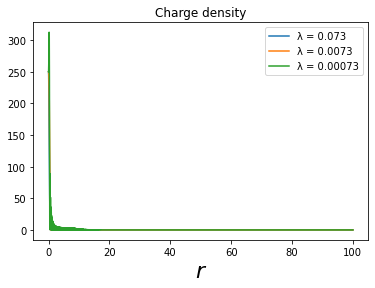

In [271]:
plt.plot(Q3.rn, Q3.QD(), label = 'λ = 0.073')
plt.plot(Q4.rn, Q4.QD(), label = 'λ = 0.0073')
plt.plot(Q5.rn, Q5.QD(), label = 'λ = 0.00073')
plt.xlabel('$r$', fontsize=22)
#plt.xlim([.0, 40])
#plt.ylim([.0, 1e])
plt.title('Charge density')
plt.legend(loc='best')
plt.savefig('Q_dens.png', dpi =150)
#plt.show()

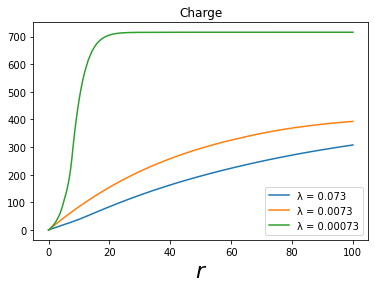

In [255]:
plt.plot(Q3.rn, Q3.Q(), label = 'λ = 0.073')
plt.plot(Q4.rn, Q4.Q(), label = 'λ = 0.0073')
plt.plot(Q5.rn, Q5.Q(), label = 'λ = 0.00073')
plt.xlabel('$r$', fontsize=22)
#plt.xlim([.0, 40])
#plt.ylim([.0, 1e])
plt.title('Charge')
plt.legend(loc='best')
#plt.show()
plt.savefig('Q.png', dpi =150)

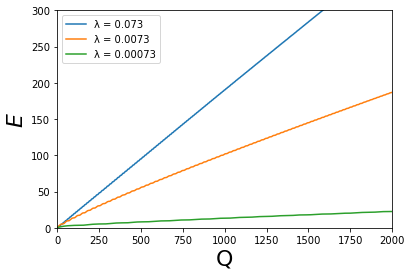

In [276]:
plt.plot(Q3.E(), Q3.Q(), label = 'λ = 0.073')
plt.plot(Q4.E(), Q4.Q(), label = 'λ = 0.0073')
plt.plot(Q5.E(), Q5.Q(), label = 'λ = 0.00073')
plt.xlim([0,2e3])
plt.ylim([0,3e2])
plt.xlabel('Q', fontsize=22)
plt.ylabel('$E$', fontsize=22)
plt.legend(loc='best')
#plt.show()
plt.savefig('QVsE.png', dpi =150)

In [126]:
λ, M = 0.0073, 1
# Initial conditions
w0 = 1, 0, 2, 0
r = 0, 100

Qi1 = Q_balls(w0, M, λ, r)
Qi1.Num_sol()

In [185]:
λ, M = 0.0073, 1
# Initial conditions
w0 = 2.5, 0, 4, 0
r = 0, 100

Qi2 = Q_balls(w0, M, λ, r)
Qi2.Num_sol()

In [187]:
λ, M = 0.0073, 1
# Initial conditions
w0 = 13, 0, 10, 0
r = 0, 100

Qi3 = Q_balls(w0, M, λ, r)
Qi3.Num_sol()

In [186]:
λ, M = 0.0073, 1
# Initial conditions
w0 = 10, 0, 7, 0
r = 0, 100

Qi4 = Q_balls(w0, M, λ, r)
Qi4.Num_sol()

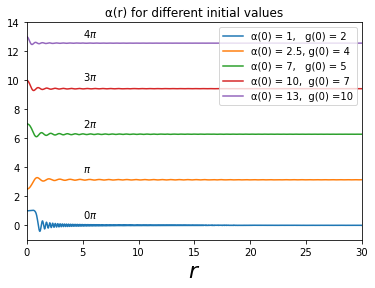

In [281]:
plt.plot(Qi1.rn, Qi1.α, label = 'α(0) = 1,   g(0) = 2')
plt.text(5, 13,'$4π$')
plt.plot(Qi2.rn, Qi2.α, label = 'α(0) = 2.5, g(0) = 4')
plt.text(5, 10,'$3π$')
plt.plot(Q4.rn, Q4.α, label =   'α(0) = 7,   g(0) = 5')
plt.text(5, 6.8,'$2π$')
plt.plot(Qi4.rn, Qi4.α, label = 'α(0) = 10,  g(0) = 7')
plt.text(5, 3.7,'$π$')
plt.plot(Qi3.rn, Qi3.α, label = 'α(0) = 13,  g(0) =10')
plt.text(5, .51,'$0π$')
plt.xlabel('$r$', fontsize=22)
plt.xlim([0, 30])
plt.ylim([-1, 14])
plt.title('α(r) for different initial values')
plt.legend(loc='upper right')
#plt.show()
plt.savefig('a_init.png', dpi =150)

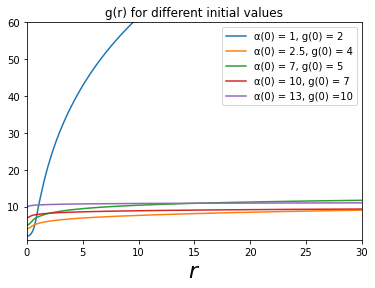

In [280]:
plt.plot(Qi1.rn, Qi1.g, label = 'α(0) = 1, g(0) = 2')
plt.plot(Qi2.rn, Qi2.g, label = 'α(0) = 2.5, g(0) = 4')
plt.plot(Q4.rn, Q4.g, label =   'α(0) = 7, g(0) = 5')
plt.plot(Qi4.rn, Qi4.g, label = 'α(0) = 10, g(0) = 7')
plt.plot(Qi3.rn, Qi3.g, label = 'α(0) = 13, g(0) =10')
plt.xlabel('$r$', fontsize=22)
plt.xlim([0, 30])
plt.ylim([1, 60])
plt.title('g(r) for different initial values')
plt.legend(loc='best')
#plt.show()
plt.savefig('g_init.png', dpi =150)